In [ ]:
https://www.kaggle.com/datasets/naderabdalghani/iam-handwritten-forms-dataset/data

In [119]:
import tensorflow as tf
import numpy as np
import os
from PIL import Image
import json
import matplotlib.pyplot as plt

time: 891 µs (started: 2024-06-22 17:30:45 +00:00)


In [121]:
import json
import numpy as np
from PIL import Image

def load_data_from_json(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)

    print(f"Loaded {len(data)} entries from JSON file.")

    images = []
    labels = []

    for entry in data:
        if not isinstance(entry, dict):
            print(f"Unexpected entry type: {type(entry)}. Skipping.")
            continue

        image_path = entry.get('image_path')  
        label = entry.get('label')  

        if not image_path or not label:
            print(f"Missing 'image_path' or 'label' in entry: {entry}. Skipping.")
            continue

        image = Image.open(image_path).convert('L')  
        image = image.resize((64, 64))  
        image = np.array(image) / 255.0  

        images.append(image)
        labels.append(label)

    return np.array(images), np.array(labels)

json_file = '/content/drive/MyDrive/churn/iam-handwritten-forms-dataset-metadata.json'  
images, labels = load_data_from_json(json_file)


Loaded 18 entries from JSON file.

Unexpected entry type: <class 'str'>. Skipping.

Unexpected entry type: <class 'str'>. Skipping.

Unexpected entry type: <class 'str'>. Skipping.

Unexpected entry type: <class 'str'>. Skipping.

Unexpected entry type: <class 'str'>. Skipping.

Unexpected entry type: <class 'str'>. Skipping.

Unexpected entry type: <class 'str'>. Skipping.

Unexpected entry type: <class 'str'>. Skipping.

Unexpected entry type: <class 'str'>. Skipping.

Unexpected entry type: <class 'str'>. Skipping.

Unexpected entry type: <class 'str'>. Skipping.

Unexpected entry type: <class 'str'>. Skipping.

Unexpected entry type: <class 'str'>. Skipping.

Unexpected entry type: <class 'str'>. Skipping.

Unexpected entry type: <class 'str'>. Skipping.

Unexpected entry type: <class 'str'>. Skipping.

Unexpected entry type: <class 'str'>. Skipping.

Unexpected entry type: <class 'str'>. Skipping.

time: 17.3 ms (started: 2024-06-22 17:31:37 +00:00)


In [122]:
images

array([], dtype=float64)

time: 11 ms (started: 2024-06-22 17:31:52 +00:00)


In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

In [ ]:
!pip install ipython-autotime
%load_ext autotime

In [ ]:
import tensorflow as tf
from google.colab import drive
import matplotlib.pyplot as plt
import keras
import re
import os
from keras.models import load_model
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.feature_extraction.text import TfidfVectorizer

time: 2 ms (started: 2024-06-22 14:55:05 +00:00)


In [117]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

time: 6.31 s (started: 2024-06-22 17:29:19 +00:00)


In [ ]:
dataset_path= '/content/drive/MyDrive/spam/spam.csv'

df= pd.read_csv(dataset_path, encoding='latin1')

df .head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


time: 52.4 ms (started: 2024-06-22 13:59:58 +00:00)


In [ ]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

time: 13.5 ms (started: 2024-06-22 14:00:01 +00:00)


In [ ]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

time: 9.21 ms (started: 2024-06-22 14:00:04 +00:00)


In [ ]:
df.duplicated().sum()

403

time: 12.6 ms (started: 2024-06-22 14:00:06 +00:00)


In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 4','Unnamed: 3'], inplace= True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


time: 34.6 ms (started: 2024-06-22 14:00:09 +00:00)


In [ ]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

time: 14.1 ms (started: 2024-06-22 14:00:14 +00:00)


In [ ]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

time: 5.7 ms (started: 2024-06-22 14:00:17 +00:00)


v1
ham     4516
spam     653
Name: count, dtype: int64

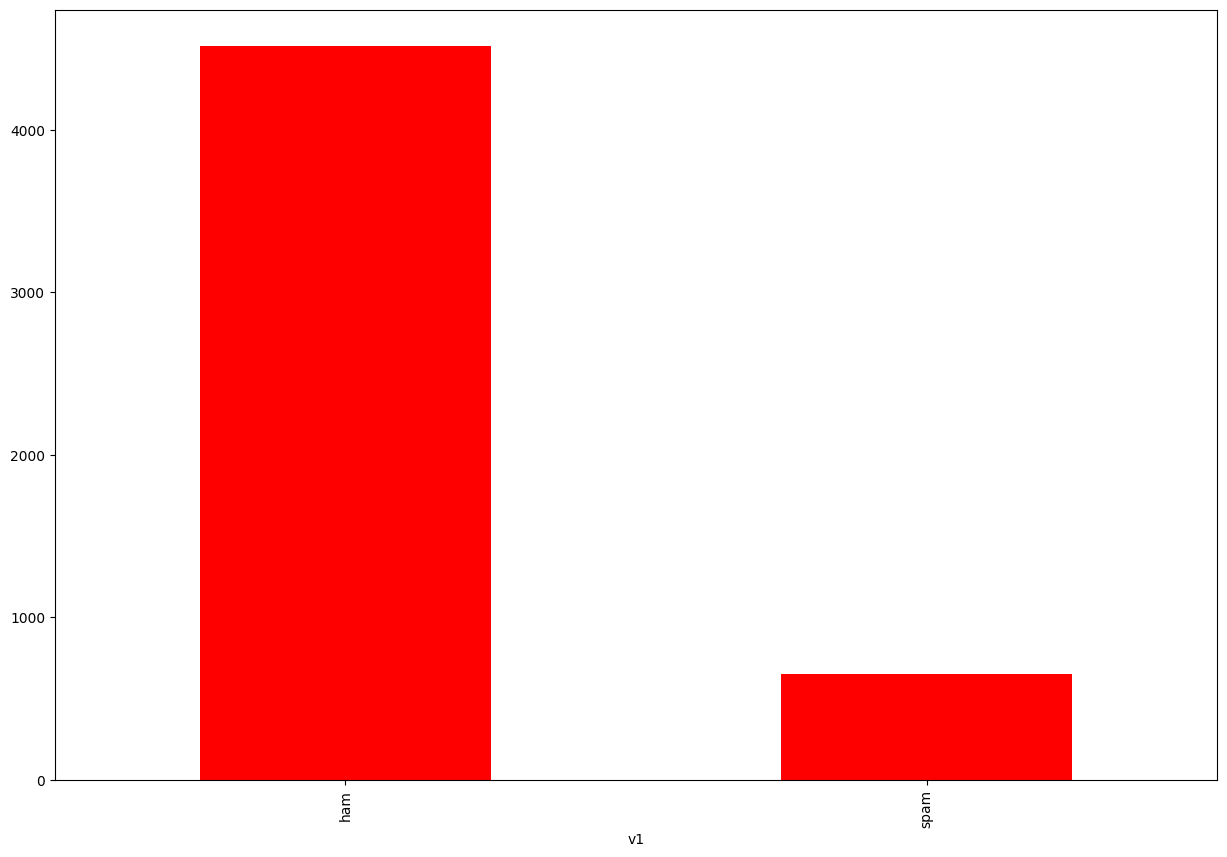

time: 748 ms (started: 2024-06-22 14:00:32 +00:00)


In [ ]:
count = df['v1']
count.value_counts().plot(kind="bar",figsize=(15,10),color='red')
count.value_counts()

In [ ]:
df.dtypes

v1    object
v2    object
dtype: object

time: 4.7 ms (started: 2024-06-22 14:01:03 +00:00)


In [ ]:
label_encoder = LabelEncoder()
df['v1'] = label_encoder.fit_transform(df['v1'])


time: 9.29 ms (started: 2024-06-22 14:03:22 +00:00)


<ipython-input-32-5a1a66264364>:3: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['v1'] = label_encoder.fit_transform(df['v1'])


In [ ]:
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


time: 60.6 ms (started: 2024-06-22 14:05:29 +00:00)


In [ ]:
X = df['v2']
Y = df['v1']

time: 856 µs (started: 2024-06-22 14:06:22 +00:00)


In [ ]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5169, dtype: object

time: 10 ms (started: 2024-06-22 14:06:25 +00:00)


In [ ]:
Y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5169, dtype: int64

time: 10.3 ms (started: 2024-06-22 14:06:30 +00:00)


In [ ]:
X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

time: 4.84 ms (started: 2024-06-22 14:17:11 +00:00)


In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((4135,), (1034,), (4135,), (1034,))

time: 3.85 ms (started: 2024-06-22 14:20:43 +00:00)


In [ ]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf_train = tfidf.fit_transform(X_train)
X_tfidf_test = tfidf.transform(X_test)
X_train_other = X_tfidf_train.toarray()
X_test_other = X_tfidf_test.toarray()

time: 1.49 s (started: 2024-06-22 14:23:42 +00:00)


In [ ]:
X_test_other,X_train_other

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

time: 8.61 ms (started: 2024-06-22 14:24:03 +00:00)


In [ ]:
X_train_other.shape, X_test_other.shape, Y_train.shape, Y_test.shape

((4135, 5000), (1034, 5000), (4135,), (1034,))

time: 22.3 ms (started: 2024-06-22 14:24:33 +00:00)


In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_tf = tokenizer.texts_to_sequences(X_train)
X_test_tf = tokenizer.texts_to_sequences(X_test)
max_length = 200
X_train_tf= pad_sequences(X_train_tf, maxlen=max_length, padding='post')
X_test_tf= pad_sequences(X_test_tf, maxlen=max_length, padding='post')

time: 224 ms (started: 2024-06-22 14:24:48 +00:00)


In [ ]:
X_train_tf.shape, X_test_tf.shape, Y_train.shape, Y_test.shape

((4135, 200), (1034, 200), (4135,), (1034,))

time: 4.04 ms (started: 2024-06-22 14:24:51 +00:00)


In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(200,)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

time: 61.3 ms (started: 2024-06-22 14:55:12 +00:00)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_8"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 dense_18 (Dense)            (None, 64)                12864     

                                                                 

 dropout_16 (Dropout)        (None, 64)                0         

                                                                 

 dense_19 (Dense)            (None, 32)                2080      

                                                                 

 dropout_17 (Dropout)        (None, 32)                0         

                                                                 

 dense_20 (Dense)            (None, 1)                 33        

                                                                 


Total params: 14977 (58.50 KB)

Trainable params: 14977 (58.50 KB)

Non-trainable params: 0 (0.00 Byte)

_________________________________________________________________


In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
history = model.fit(X_train_tf, Y_train, epochs=150, batch_size=32, validation_split=0.2,callbacks=[early_stopping])

Epoch 1/150

104/104 [==============================] - 1s 5ms/step - loss: 86.0509 - accuracy: 0.7331 - val_loss: 9.9504 - val_accuracy: 0.8827

Epoch 2/150

104/104 [==============================] - 0s 3ms/step - loss: 36.6845 - accuracy: 0.7784 - val_loss: 4.5348 - val_accuracy: 0.8936

Epoch 3/150

104/104 [==============================] - 0s 3ms/step - loss: 21.2380 - accuracy: 0.7820 - val_loss: 2.2171 - val_accuracy: 0.8658

Epoch 4/150

104/104 [==============================] - 1s 5ms/step - loss: 13.0346 - accuracy: 0.7914 - val_loss: 1.2675 - val_accuracy: 0.8513

Epoch 5/150

104/104 [==============================] - 1s 6ms/step - loss: 9.6744 - accuracy: 0.7993 - val_loss: 0.6602 - val_accuracy: 0.8525

Epoch 6/150

104/104 [==============================] - 1s 5ms/step - loss: 6.4488 - accuracy: 0.7975 - val_loss: 0.4927 - val_accuracy: 0.8767

Epoch 7/150

104/104 [==============================] - 1s 5ms/step - loss: 4.4834 - accuracy: 0.8083 - val_loss: 0.4660 - val

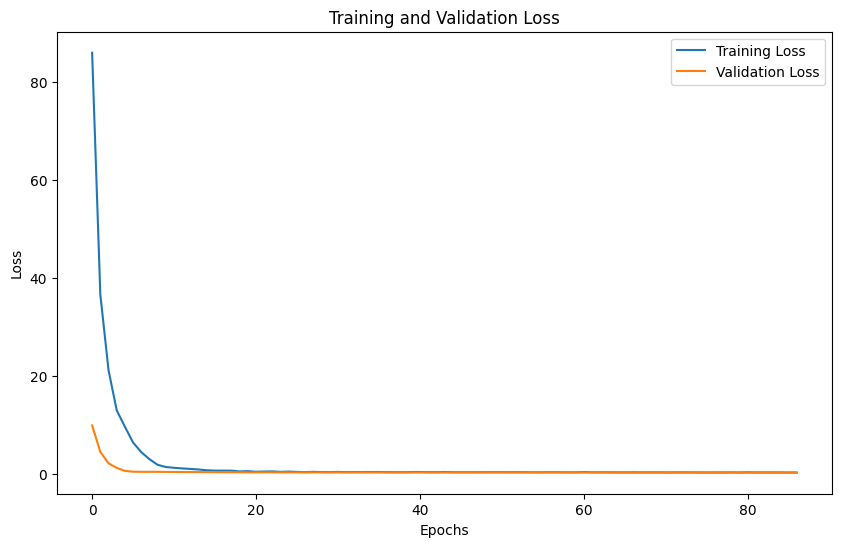

time: 389 ms (started: 2024-06-22 15:01:31 +00:00)


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Logistic Regression**

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train_other,Y_train)

LogisticRegression()

time: 673 ms (started: 2024-06-22 14:56:28 +00:00)


**Naive Bayes**

In [ ]:
nb= MultinomialNB()
nb.fit(X_train_other, Y_train)

MultinomialNB()

time: 73.8 ms (started: 2024-06-22 14:56:31 +00:00)


**Support Vector Machine**

In [ ]:
svm = SVC()
svm.fit(X_train_other,Y_train)

SVC()

time: 38.5 s (started: 2024-06-22 14:56:33 +00:00)


In [ ]:
# Evaluate
loss, accuracy = model.evaluate(X_test_tf, Y_test)
print(f'\n Accuracy: {accuracy}')

# Predict
y_pred_tf = (model.predict(X_test_tf) > 0.5).astype("int32")

33/33 [==============================] - 0s 2ms/step - loss: 0.3568 - accuracy: 0.8627



 Accuracy: 0.8626692295074463

33/33 [==============================] - 0s 1ms/step

time: 403 ms (started: 2024-06-22 14:56:07 +00:00)


**Logistic Regression**

In [ ]:
# Predict
y_pred_log_reg = log_reg.predict(X_test_other)
print(f"Accuracy: {accuracy_score(Y_test, y_pred_log_reg)}")
print(classification_report(Y_test, y_pred_log_reg))

Accuracy: 0.9661508704061895

              precision    recall  f1-score   support



           0       0.96      1.00      0.98       889

           1       0.98      0.77      0.86       145



    accuracy                           0.97      1034

   macro avg       0.97      0.89      0.92      1034

weighted avg       0.97      0.97      0.96      1034



time: 36.1 ms (started: 2024-06-22 14:58:35 +00:00)


**Naive Bayes**

In [ ]:
# Predict
y_pred_nb = nb.predict(X_test_other)
print(f"Accuracy: {accuracy_score(Y_test, y_pred_nb)}")
print(classification_report(Y_test, y_pred_nb))

Accuracy: 0.971953578336557

              precision    recall  f1-score   support



           0       0.97      1.00      0.98       889

           1       1.00      0.80      0.89       145



    accuracy                           0.97      1034

   macro avg       0.98      0.90      0.94      1034

weighted avg       0.97      0.97      0.97      1034



time: 31.5 ms (started: 2024-06-22 14:58:41 +00:00)


**Support Vector Machine**

In [ ]:
# Predict
y_svm_predict = svm.predict(X_test_other)
print(f"Accuracy: {accuracy_score(Y_test, y_svm_predict)}")
print(classification_report(Y_test, y_svm_predict))

Accuracy: 0.9806576402321083

              precision    recall  f1-score   support



           0       0.98      1.00      0.99       889

           1       0.99      0.87      0.93       145



    accuracy                           0.98      1034

   macro avg       0.99      0.93      0.96      1034

weighted avg       0.98      0.98      0.98      1034



time: 15.5 s (started: 2024-06-22 14:58:44 +00:00)


In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Spam detection confusion Matrix')
    plt.show()


time: 1.11 ms (started: 2024-06-22 14:59:07 +00:00)


**Tensorflow model**

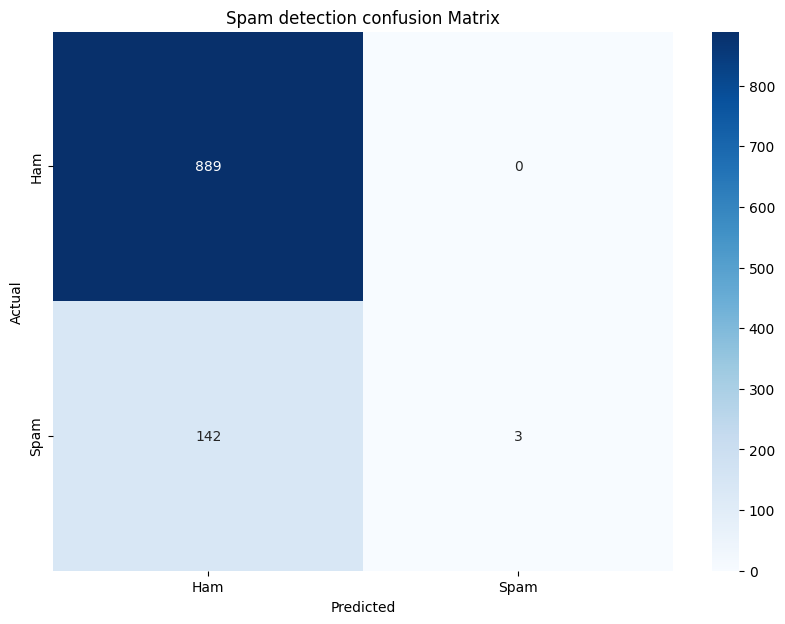

time: 307 ms (started: 2024-06-22 14:59:10 +00:00)


In [ ]:
plot_confusion_matrix(Y_test, y_pred_tf)

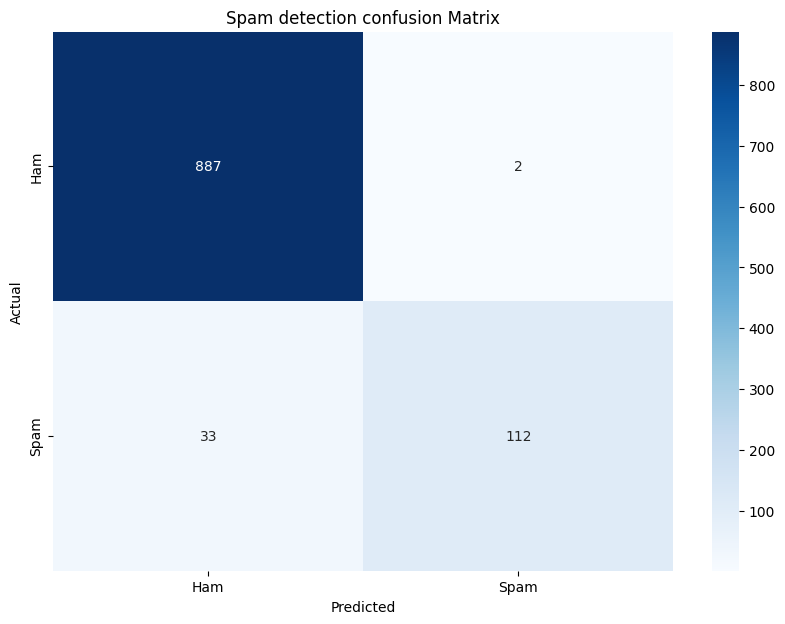

time: 281 ms (started: 2024-06-22 14:59:14 +00:00)


In [ ]:
plot_confusion_matrix(Y_test, y_pred_log_reg)

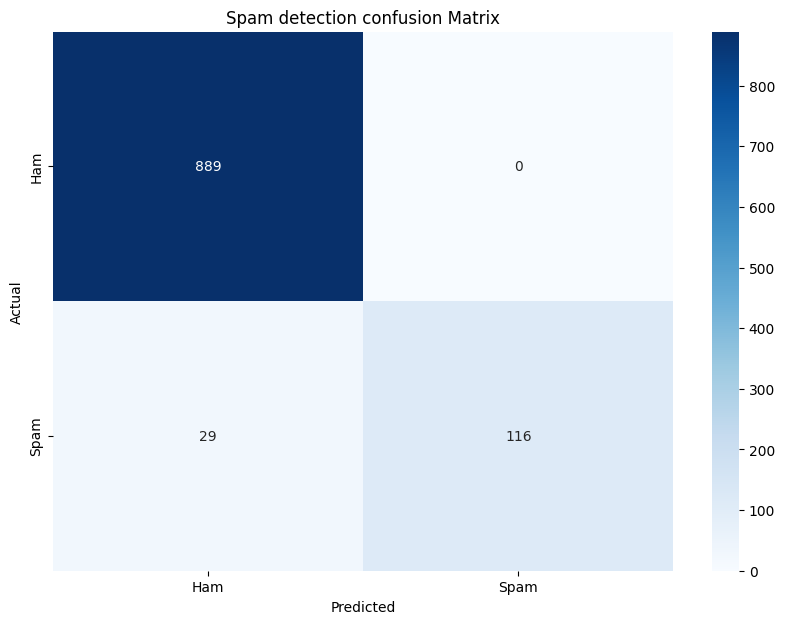

time: 410 ms (started: 2024-06-22 14:59:18 +00:00)


In [ ]:
plot_confusion_matrix(Y_test, y_pred_nb)

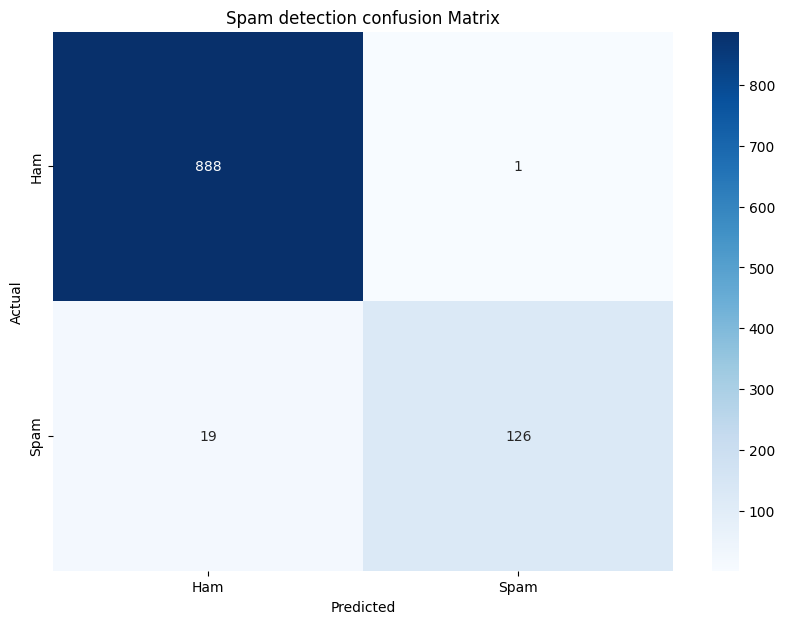

time: 39.8 s (started: 2024-06-22 14:59:24 +00:00)


In [ ]:
plot_confusion_matrix(Y_test, y_svm_predict)